# Generate grids

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import pandas as pd
from itertools import cycle, islice
import seaborn as sns

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [3]:
from scipy import interpolate

In [4]:
from libradtranpy import  libsimulateVisible

libradtranpath= /Users/dagoret/MacOSX/External/libRadtran2/


In [5]:
import warnings
warnings.filterwarnings('ignore')

# Configuration

In [6]:
file1_out = f"atmospherictransparencygrid_rayleigh_training_debug.npy"
file2_out = f"atmospherictransparencygrid_rayleigh_test_debug.npy"

In [7]:
file3_out = f"atmospherictransparencygrid_O2abs_training_debug.npy"
file4_out = f"atmospherictransparencygrid_O2abs_test_debug.npy"

In [8]:
file5_out = f"atmospherictransparencygrid_PWVabs_training_debug.npy"
file6_out = f"atmospherictransparencygrid_PWVabs_test_debug.npy"

In [9]:
file7_out = f"atmospherictransparencygrid_OZabs_training_debug.npy"
file8_out = f"atmospherictransparencygrid_OZabs_test_debug.npy"

### wavelength

In [10]:
WLMIN=300.
WLMAX=1100.
WLBIN=1.
NWLBIN=int((WLMAX-WLMIN)/WLBIN)
WL=np.linspace(WLMIN,WLMAX,NWLBIN)

### airmass

In [11]:
AIRMASSMIN=1.0
#AIRMASSMAX=2.6
AIRMASSMAX=1.2
DAM = 0.1

In [12]:
airmasses = np.arange(AIRMASSMIN,AIRMASSMAX,DAM)

In [13]:
airmasses

array([1. , 1.1])

In [14]:
NAM=len(airmasses)

In [15]:
sequential_colors = sns.color_palette("hls", NAM)

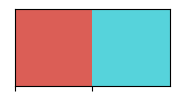

In [16]:
sns.palplot(sequential_colors)

In [17]:
airmass_training = airmasses
airmass_test = airmasses + DAM/2.

In [18]:
NX=len(airmasses)
NY=NWLBIN

### PWV

In [19]:
PWVMIN = 0
PWVMAX = 3
DPWV = 0.5

In [20]:
pwv_training = np.arange(PWVMIN,PWVMAX,DPWV)
pwv_test = pwv_training + DPWV/2.

In [21]:
NPWV = len(pwv_training)

### OZON

In [22]:
OZMIN = 300
OZMAX = 500
DOZ   = 100

In [23]:
oz_training = np.arange(OZMIN,OZMAX,DOZ)
oz_test = oz_training  + DOZ/2.

In [24]:
NOZ = len(oz_training)

### Data

In [25]:
data_O2abs_training=np.zeros((NWLBIN,NAM))
data_O2abs_test=np.zeros((NWLBIN,NAM))

data_rayleigh_training=np.zeros((NWLBIN,NAM))
data_rayleigh_test=np.zeros((NWLBIN,NAM))

In [26]:
data_H2Oabs_training=np.zeros((NWLBIN,NAM,NPWV))
data_H2Oabs_test=np.zeros((NWLBIN,NAM,NPWV))

In [27]:
data_OZabs_training=np.zeros((NWLBIN,NAM,NOZ))
data_OZabs_test=np.zeros((NWLBIN,NAM,NOZ))

In [28]:
pwv= 0
pwv= 0
oz = 0

In [29]:
for idx,am in enumerate(airmass_training):
    path,thefile = libsimulateVisible.ProcessSimulation(am,pwv,oz,0,prof_str='us',proc_str='sc',cloudext=0.0, FLAG_VERBOSE=False)
    data = np.loadtxt(os.path.join(path,thefile))
    f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
    atm=f(WL)
    data_rayleigh_training[:,idx]=atm
    

In [30]:
np.save(file1_out,data_rayleigh_training, allow_pickle=False)

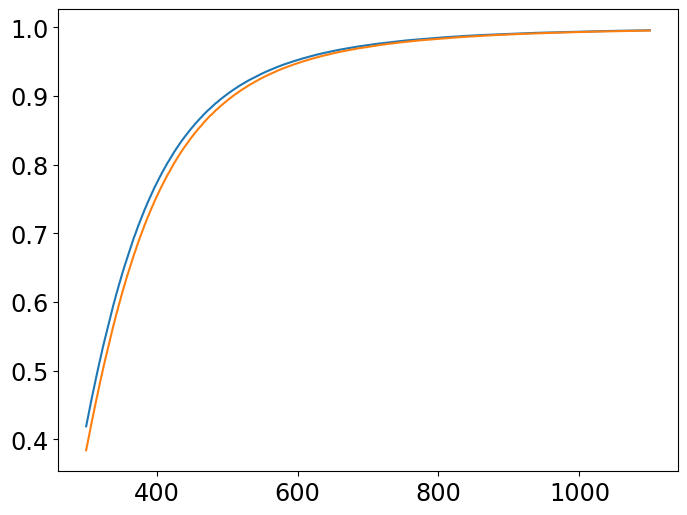

In [31]:
plt.plot(WL,data_rayleigh_training[:,:])

In [32]:
for idx,am in enumerate(airmass_test):
    path,thefile = libsimulateVisible.ProcessSimulation(am,pwv,oz,0,prof_str='us',proc_str='sc',cloudext=0.0, FLAG_VERBOSE=False)
    data = np.loadtxt(os.path.join(path,thefile))
    f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
    atm=f(WL)
    data_rayleigh_test[:,idx]=atm

In [33]:
np.save(file2_out,data_rayleigh_test, allow_pickle=False)

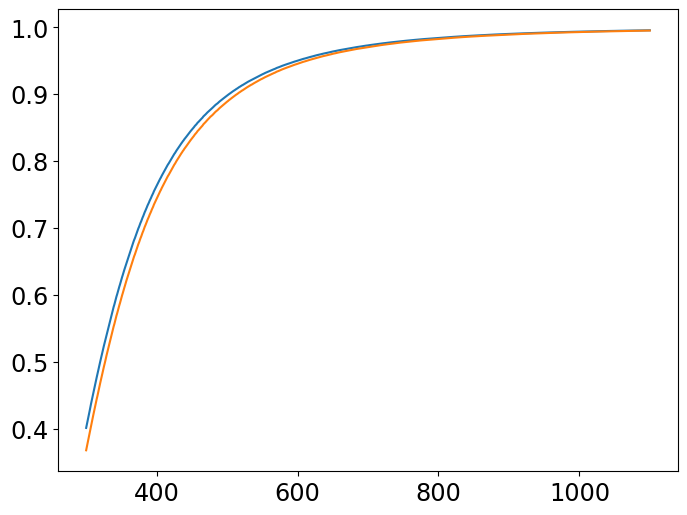

In [34]:
plt.plot(WL,data_rayleigh_test[:,:])

In [35]:
for idx,am in enumerate(airmass_training):
    path,thefile = libsimulateVisible.ProcessSimulation(am,pwv,oz,0,prof_str='us',proc_str='ab',cloudext=0.0, FLAG_VERBOSE=False)
    data = np.loadtxt(os.path.join(path,thefile))
    f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
    atm=f(WL)
    data_O2abs_training[:,idx]=atm

In [36]:
np.save(file3_out,data_O2abs_training, allow_pickle=False)

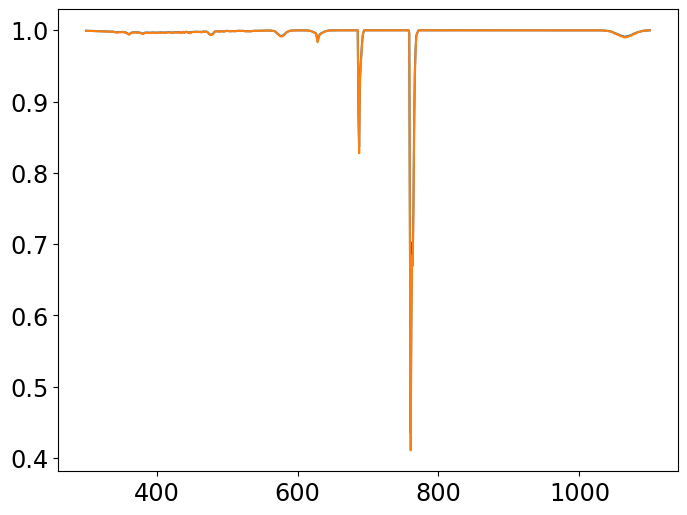

In [37]:
plt.plot(WL,data_O2abs_training[:,:])

In [38]:
for idx,am in enumerate(airmass_test):
    path,thefile = libsimulateVisible.ProcessSimulation(am,pwv,oz,0,prof_str='us',proc_str='ab',cloudext=0.0, FLAG_VERBOSE=False)
    data = np.loadtxt(os.path.join(path,thefile))
    f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
    atm=f(WL)
    data_O2abs_test[:,idx]=atm

In [39]:
np.save(file4_out,data_O2abs_test, allow_pickle=False)

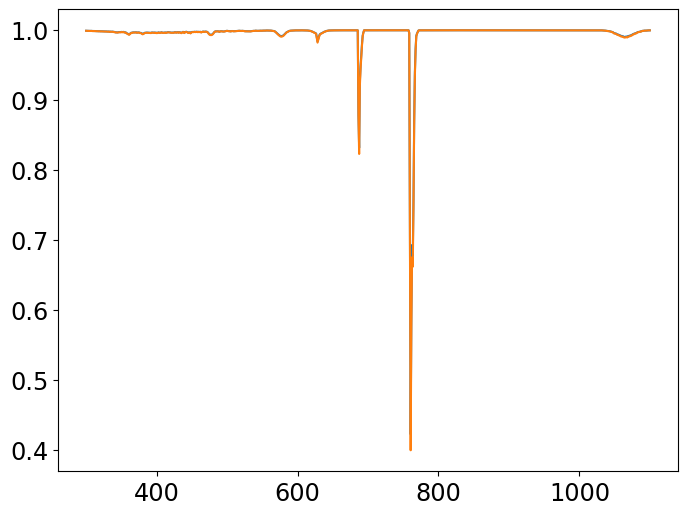

In [40]:
plt.plot(WL,data_O2abs_test[:,:])

## Precipitable water vapor

In [41]:
oz=0
for idx_pwv,pwv in enumerate(pwv_training):
    data_slice_training=np.zeros((NWLBIN,NAM))
    for idx_am,am in enumerate(airmass_training):     
        path,thefile = libsimulateVisible.ProcessSimulation(am,pwv,oz,0,prof_str='us',proc_str='ab',cloudext=0.0, FLAG_VERBOSE=False)
        data = np.loadtxt(os.path.join(path,thefile))
        f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
        atm=f(WL)
        data_slice_training[:,idx_am]=atm
        
    data_slice_training/=data_O2abs_training
    data_H2Oabs_training[:,:,idx_pwv] = data_slice_training
       

In [42]:
np.save(file5_out,data_H2Oabs_training, allow_pickle=False)

In [43]:
oz=0
for idx_pwv,pwv in enumerate(pwv_test):
    data_slice_test=np.zeros((NWLBIN,NAM))
    for idx_am,am in enumerate(airmass_test):     
        path,thefile = libsimulateVisible.ProcessSimulation(am,pwv,oz,0,prof_str='us',proc_str='ab',cloudext=0.0, FLAG_VERBOSE=False)
        data = np.loadtxt(os.path.join(path,thefile))
        f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
        atm=f(WL)
        data_slice_test[:,idx_am]=atm
        
    data_slice_test/=data_O2abs_test
    data_H2Oabs_test[:,:,idx_pwv] = data_slice_test

In [44]:
np.save(file6_out,data_H2Oabs_test,allow_pickle=False)

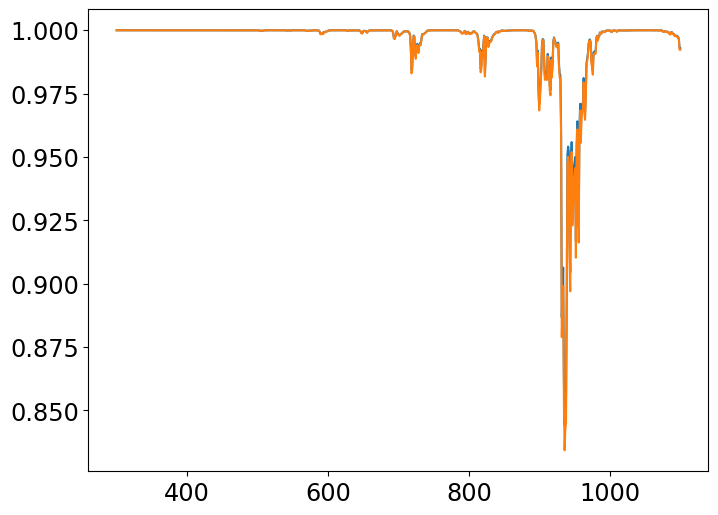

In [53]:
plt.plot(WL,data_H2Oabs_test[:,0,1])
plt.plot(WL,data_H2Oabs_test[:,1,1])

## Ozone

In [46]:
pwv=0
for idx_oz,oz in enumerate(oz_training):
    data_slice_training=np.zeros((NWLBIN,NAM))
    for idx_am,am in enumerate(airmass_training):     
        path,thefile = libsimulateVisible.ProcessSimulation(am,pwv,oz,0,prof_str='us',proc_str='ab',cloudext=0.0, FLAG_VERBOSE=False)
        data = np.loadtxt(os.path.join(path,thefile))
        f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
        atm=f(WL)
        data_slice_training[:,idx_am]=atm
        
    data_slice_training/=data_O2abs_training
    data_OZabs_training[:,:,idx_oz] = data_slice_training

In [47]:
np.save(file7_out,data_OZabs_training, allow_pickle=False)

In [48]:
pwv=0
for idx_oz,oz in enumerate(oz_test):
    data_slice_test=np.zeros((NWLBIN,NAM))
    for idx_am,am in enumerate(airmass_test):     
        path,thefile = libsimulateVisible.ProcessSimulation(am,pwv,oz,0,prof_str='us',proc_str='ab',cloudext=0.0, FLAG_VERBOSE=False)
        data = np.loadtxt(os.path.join(path,thefile))
        f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
        atm=f(WL)
        data_slice_test[:,idx_am]=atm
        
    data_slice_test/=data_O2abs_test
    data_OZabs_test[:,:,idx_oz] = data_slice_test

In [49]:
np.save(file8_out,data_OZabs_test, allow_pickle=False)